# Task 1: Classical ML with Scikit-learn

In [16]:

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [17]:
# Step 2: Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [19]:
# Step 2: Load the dataset
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
df = pd.concat([X, y], axis=1)

# Optional: Map species numbers to names
df['species_name'] = df['species'].map(dict(enumerate(iris.target_names)))

#  Basic info
print(" First few rows of the dataset:")
print(df.head())



 First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [20]:
print("\n Dataset summary:")
print(df.describe())


 Dataset summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [21]:
print("\n Unique target classes:")
print(df['species_name'].value_counts())


 Unique target classes:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# EDA VISUALIZATIONS


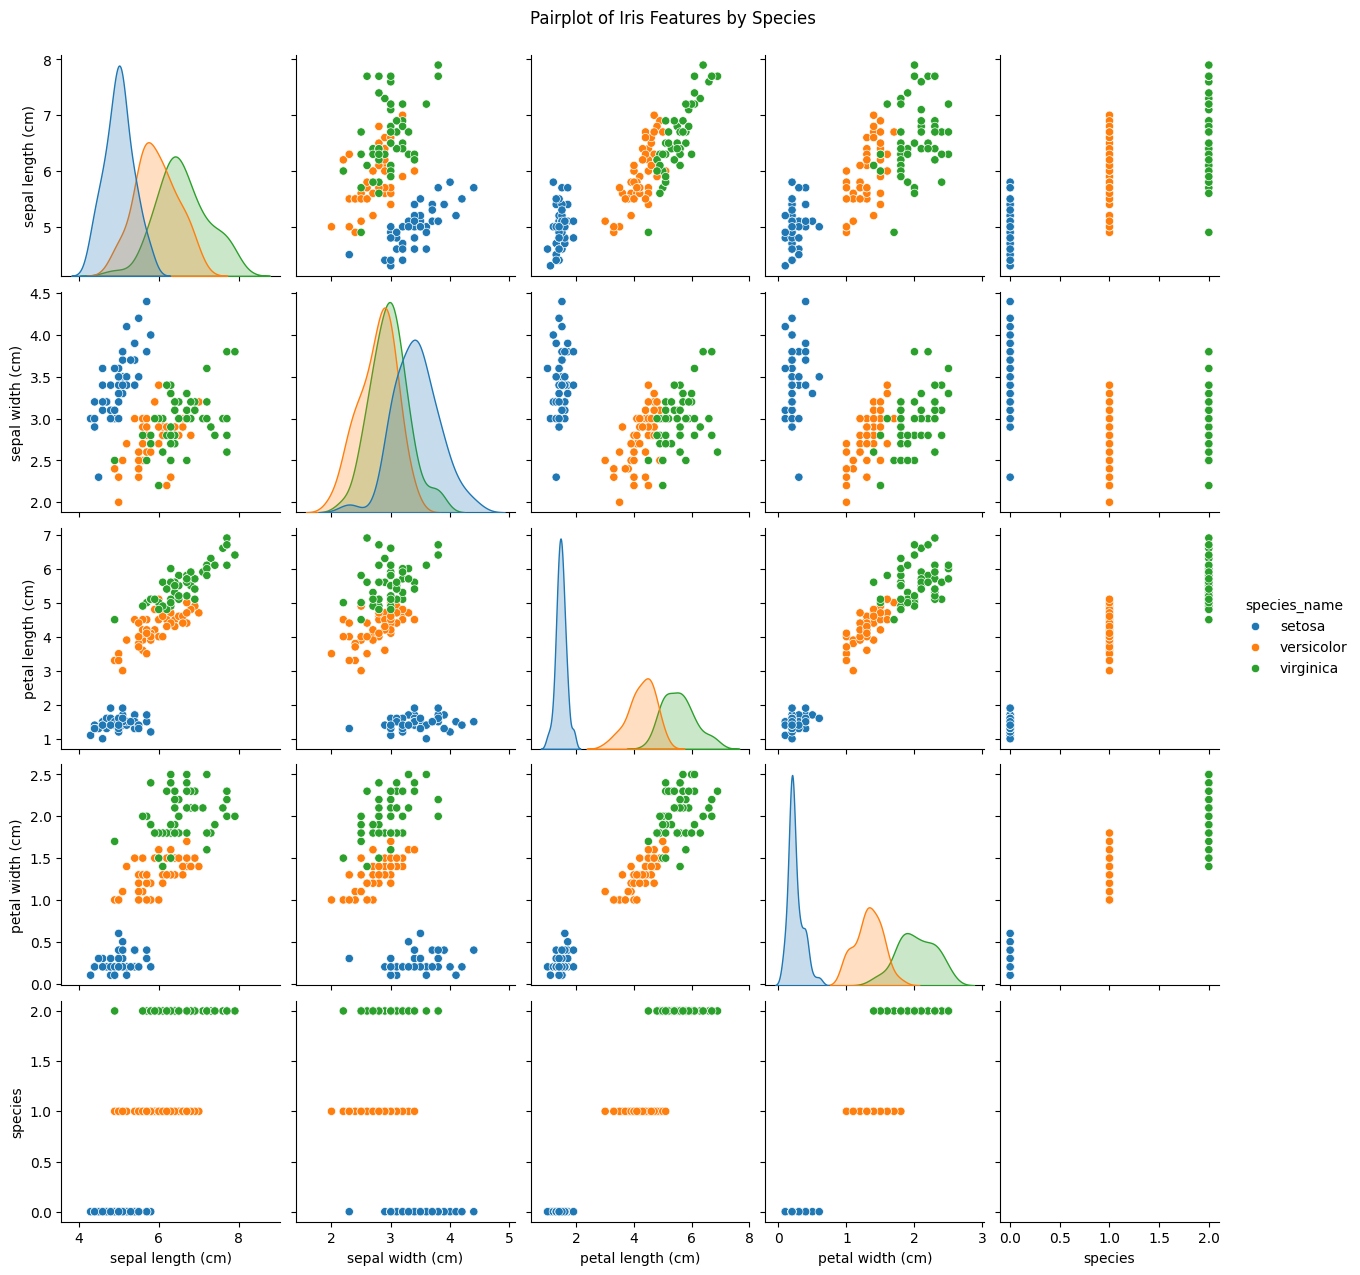

In [23]:
# Pairplot (scatterplot matrix)
sns.pairplot(df, hue="species_name", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


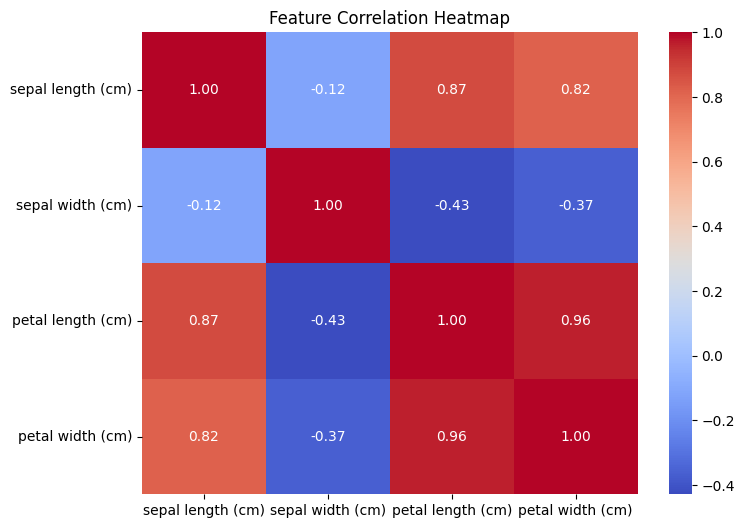

In [24]:
# CORRELATION Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


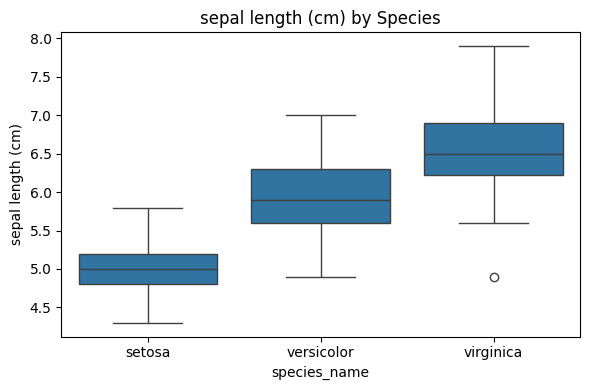

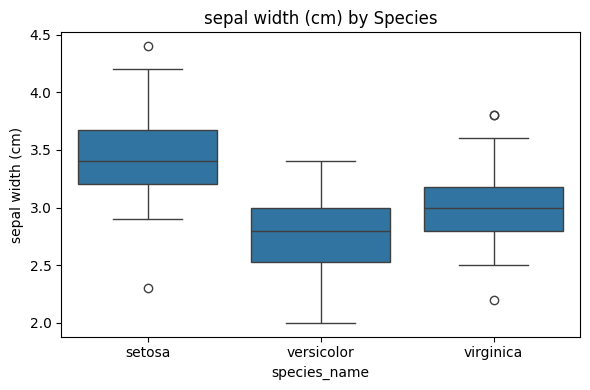

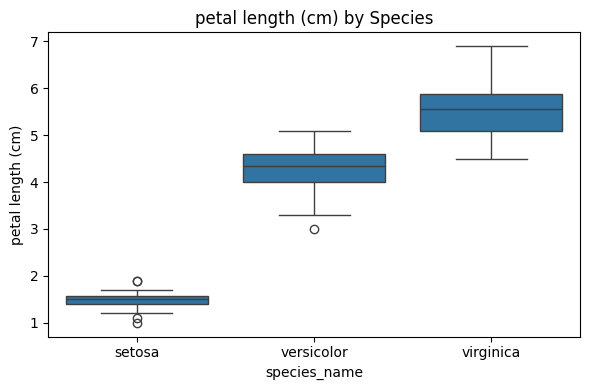

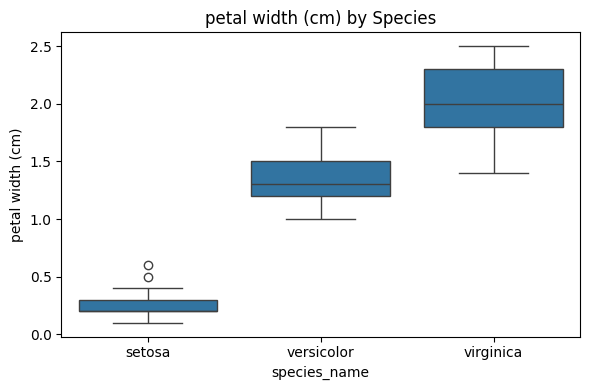

In [25]:
# Boxplot by species
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species_name', y=col, data=df)
    plt.title(f'{col} by Species')
    plt.tight_layout()
    plt.show()


In [ ]:
# Optional: Introduce missing values for demonstration
X.iloc[0, 0] = np.nan
X.iloc[4, 2] = np.nan

In [ ]:
# Step 3: Handle missing values
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=iris.feature_names)

In [ ]:
# Step 4: Encode target labels (already numeric in this dataset, but demonstrated here)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Step 5: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Step 6: Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # average='macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')

In [ ]:
# Step 9: Print the results
print("📊 Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")

📊 Evaluation Metrics:
Accuracy  : 0.98
Precision : 0.98
Recall    : 0.98



# Task 2: Deep Learning with TensorFlow/PyTorch


In [2]:
# Task 2: Deep Learning with TensorFlow/PyTorch
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report

In [3]:
# # Step 1: Import libraries
# Step 2: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")


Training set shape: (60000, 28, 28), Labels: (60000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


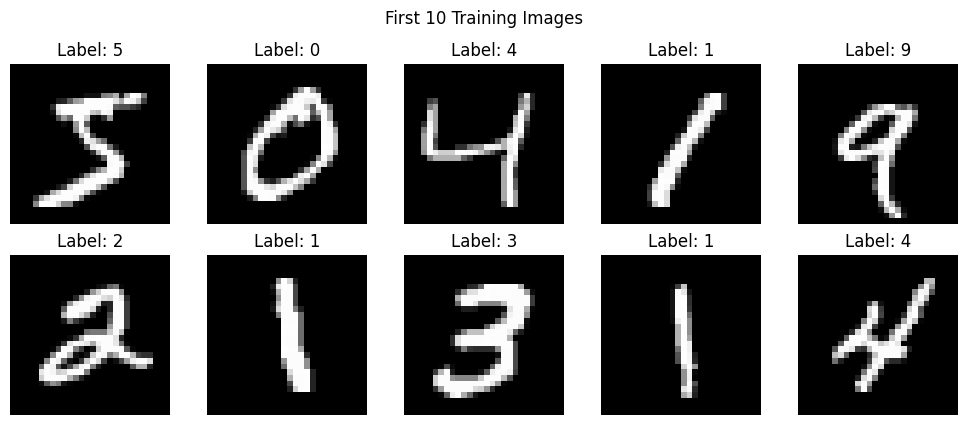

In [5]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("First 10 Training Images", y=1.05)
plt.show()


In [6]:
# Normalize pixel values to [0, 1] and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
# Reshape to (samples, 28, 28, 1) for CNN input
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [8]:
# Step 3: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.8872 - loss: 0.3688 - val_accuracy: 0.9807 - val_loss: 0.0615
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9829 - loss: 0.0582 - val_accuracy: 0.9877 - val_loss: 0.0423
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9872 - val_loss: 0.0361
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9897 - val_loss: 0.0355
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9910 - val_loss: 0.0306


In [11]:
# Step 7: Classification Report (optional)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



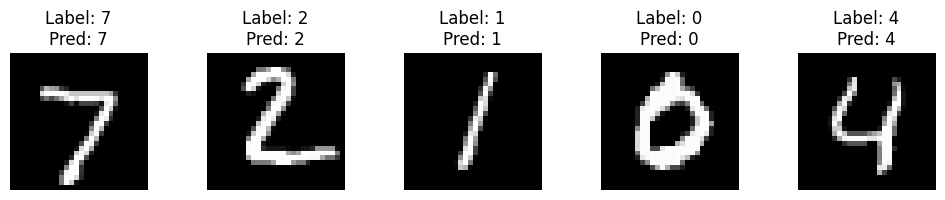

In [12]:
# Step 8: Visualize predictions on 5 test images
def plot_sample_predictions(images, labels, predictions, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Squeeze fixes shape
        plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
plot_sample_predictions(x_test, y_test, y_pred_classes)

# SAVE THE MODEL

In [13]:
# Save the entire model to a file (architecture + weights + optimizer state)
model.save('mnist_cnn_model.h5')
print("Model saved to 'mnist_cnn_model.h5'")


Model saved to 'mnist_cnn_model.h5'


In [15]:
model.save('mnist_cnn_model.keras')  # ✅ Native Keras format



# Task 3: NLP with spaCy

In [ ]:
# Download Dataset from KaggleHub
import kagglehub

# Download dataset
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")
print("Path to dataset files:", path)


100%|██████████| 493M/493M [00:07<00:00, 73.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bittlingmayer/amazonreviews/versions/7


In [ ]:

import kagglehub
import os


path = kagglehub.dataset_download("bittlingmayer/amazonreviews")

print(" Dataset path:", path)


for root, dirs, files in os.walk(path):
    for file in files:
        print("", os.path.join(root, file))


 Dataset path: /kaggle/input/amazonreviews
 /kaggle/input/amazonreviews/test.ft.txt.bz2
 /kaggle/input/amazonreviews/train.ft.txt.bz2


In [ ]:
import bz2
import pandas as pd
import spacy
from tqdm import tqdm

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# File path from Kaggle dataset
file_path = "/kaggle/input/amazonreviews/train.ft.txt.bz2"

# Load a sample of 100,000 reviews
data = []
with bz2.open(file_path, "rt", encoding="utf-8") as f:
    for i, line in enumerate(tqdm(f, total=100000)):
        if i >= 100000:
            break
        label, text = line.strip().split(' ', 1)
        sentiment_label = 1 if label == "__label__2" else 0  # 1 = Positive, 0 = Negative
        data.append({"review_text": text, "sentiment": sentiment_label})

df = pd.DataFrame(data)
df.head()


100%|██████████| 100000/100000 [00:02<00:00, 33934.08it/s]


,review_text,sentiment
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


**Preprocessing and cleaning the reviews**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  100000 non-null  object
 1   sentiment    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


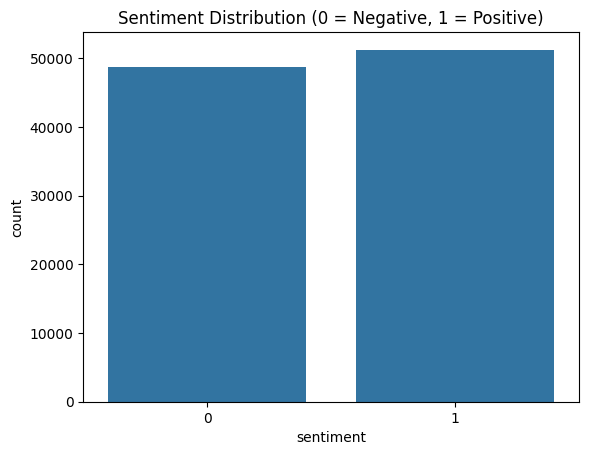

sentiment
1    0.51267
0    0.48733
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()

print(df['sentiment'].value_counts(normalize=True))


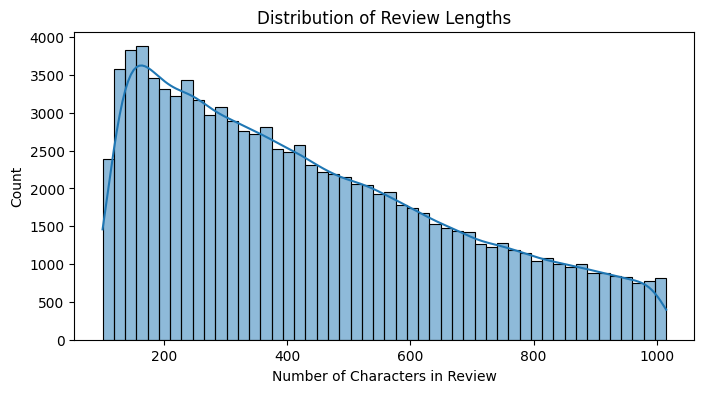

count    100000.00000
mean        439.53839
std         240.44770
min         101.00000
25%         236.00000
50%         393.00000
75%         608.00000
max        1015.00000
Name: review_length, dtype: float64


In [ ]:
df["review_length"] = df["review_text"].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters in Review")
plt.show()

print(df["review_length"].describe())


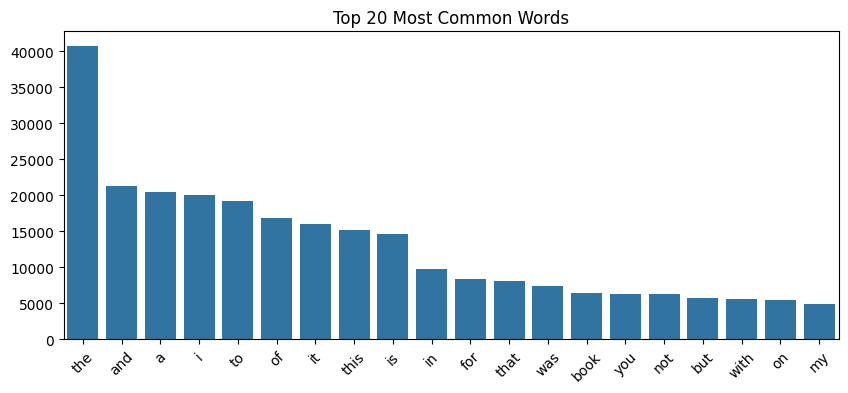

In [ ]:
from collections import Counter
import re

def clean_and_tokenize(text):
    text = re.sub(r"[^\w\s]", "", text.lower())
    return text.split()

# Flatten token list from 10,000 reviews for speed
all_words = []
for review in df["review_text"].head(10000):  # use subset for speed
    all_words.extend(clean_and_tokenize(review))

word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()


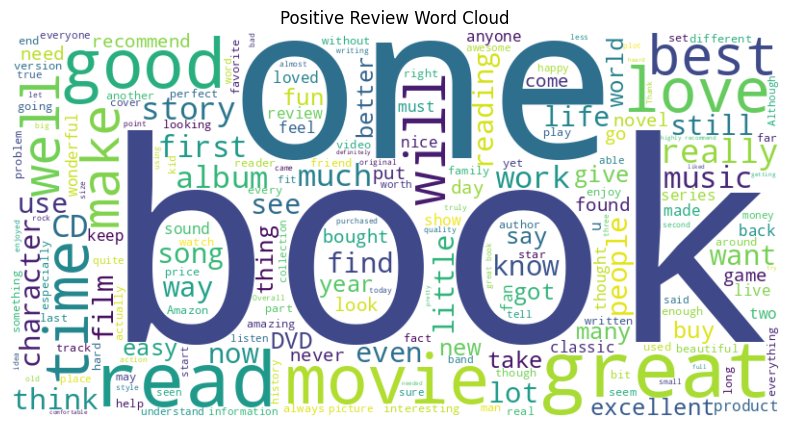

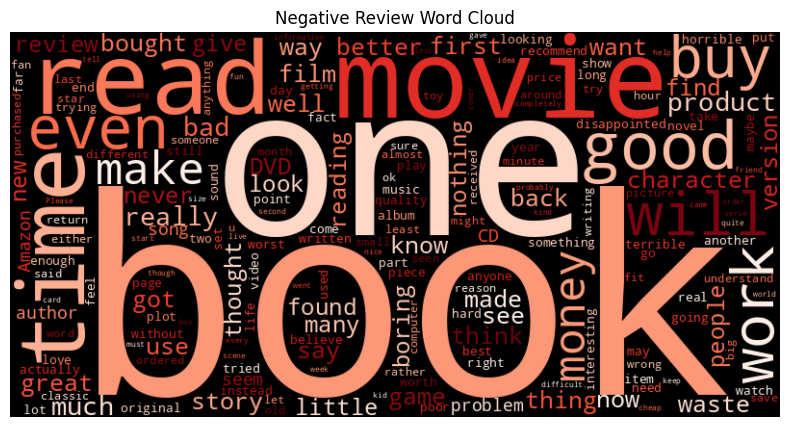

In [ ]:
from wordcloud import WordCloud

positive_text = " ".join(df[df["sentiment"] == 1]["review_text"].head(5000))
negative_text = " ".join(df[df["sentiment"] == 0]["review_text"].head(5000))

# Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Review Word Cloud")
plt.show()

# Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Review Word Cloud")
plt.show()


#  named entity recognition (NER) to extract product names and brands.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Small model with NER support


In [ ]:
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ["ORG", "PRODUCT"]]


In [ ]:
from tqdm import tqdm
tqdm.pandas()

# Only using a subset for performance
df_subset = df.head(10000).copy()
df_subset["entities"] = df_subset["review_text"].progress_apply(extract_entities)


100%|██████████| 10000/10000 [03:34<00:00, 46.71it/s]


In [ ]:
df_subset[["review_text", "entities"]].head(10)


,review_text,entities
0,Stuning even for the non-gamer: This sound tra...,[Chrono Cross]
1,The best soundtrack ever to anything.: I'm rea...,[]
2,Amazing!: This soundtrack is my favorite music...,"[Time, Scar~]"
3,Excellent Soundtrack: I truly like this soundt...,"[Between Life and Death, Forest Of Illusion, F..."
4,"Remember, Pull Your Jaw Off The Floor After He...","[Chrono Cross, Time]"
5,an absolute masterpiece: I am quite sure any o...,[Time]
6,"Buyer beware: This is a self-published book, a...",[Amazon]
7,Glorious story: I loved Whisper of the wicked ...,[]
8,A FIVE STAR BOOK: I just finished reading Whis...,"[Whisper of the Wicked, Julia]"
9,Whispers of the Wicked Saints: This was a easy...,[]


In [ ]:
df_with_entities = df_subset[df_subset["entities"].map(len) > 0]
df_with_entities[["review_text", "entities"]].sample(10)


,review_text,entities
7144,cheap cheap cheap...: I fell in love with the ...,[THREE]
8311,ADS Instant Video: You get audio signal onlt w...,"[ADS Instant Video, ADS, ASAP]"
9140,An intense and powerful Drama!: I purchased th...,[Collection]
6901,Big Brother is Watching!: George Orwell's book...,[Julia]
1268,My thoughts on a terrible book: This book is a...,"[Ticonderoga, J.P.]"
6765,2 Stars For Persistence: Often I feel some adm...,[Aggie]
8640,"Not the Space Program, Rather Mecury, Gemini a...","[Apollo, Mercury, Apollo]"
2620,finally! A book that's different.: I don't und...,[FORCED]
8082,Causes computer to reboot: This card was big d...,"[Windows XP Pro, Windows Media Player, RealPla..."
8220,in the crappy tradition of houseonhauntedhill ...,"[House On Haunted Hill, Wilson]"


In [ ]:
from collections import Counter

all_entities = [ent for sublist in df_with_entities["entities"] for ent in sublist]
entity_counts = Counter(all_entities)

# Display top 20
entity_counts.most_common(20)


[('Amazon', 403),
 ('Orwell', 109),
 ('Sony', 73),
 ('Apple', 73),
 ('HP', 57),
 ('USB', 48),
 ('VHS', 44),
 ('BUY', 42),
 ('Foundation', 38),
 ('Kerouac', 32),
 ('Garbage', 30),
 ('Amazon.com', 28),
 ('Fahrenheit 451', 26),
 ('Classic', 25),
 ('Marquez', 25),
 ('NEVER', 24),
 ('Titanic', 22),
 ('un', 21),
 ('CGI', 21),
 ('Tomcat', 21)]

**Analyze sentiment (positive/negative) using a rule-based approach.**

In [ ]:
import nltk
nltk.download("vader_lexicon")

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def rule_based_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return 0  # Negative
    else:
        return -1  # Neutral (optional handling)


In [ ]:
# Work on the same subset of 10,000 reviews
df_subset["predicted_sentiment"] = df_subset["review_text"].progress_apply(rule_based_sentiment)


100%|██████████| 10000/10000 [00:08<00:00, 1197.17it/s]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Drop neutral predictions for fair binary comparison
df_binary = df_subset[df_subset["predicted_sentiment"] != -1]

print("Accuracy:", accuracy_score(df_binary["sentiment"], df_binary["predicted_sentiment"]))
print("\nClassification Report:")
print(classification_report(df_binary["sentiment"], df_binary["predicted_sentiment"]))


Accuracy: 0.7172774869109948

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.53      0.65      4920
           1       0.65      0.91      0.76      4821

    accuracy                           0.72      9741
   macro avg       0.76      0.72      0.71      9741
weighted avg       0.76      0.72      0.71      9741



In [ ]:
df_subset["compound_score"] = df_subset["review_text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df_subset[["review_text", "compound_score", "predicted_sentiment"]].sample(10)


,review_text,compound_score,predicted_sentiment
3164,"Good product, but not really needed by younger...",0.9809,1
7832,"ok, while it lasted....: It was ok, unless I l...",-0.2874,0
8581,Max Keeble is extremely cool: I wish Max Keebl...,0.9379,1
2739,Love this petit kitchen: I love this little ki...,0.9347,1
1936,Not for Metal!: Received this in great time- I...,0.6351,1
1588,"Simply Borred: Borred, Borred and very borred!...",0.0000,-1
7591,Snake Oil: The Digital Media Reader may work w...,-0.9764,0
7422,Must see: I really liked this movie. I can't s...,-0.0797,0
6703,no sale: The DVD set lacks CC for the hearing ...,-0.5095,0
1751,Read the reviews first!: I bought this on a wh...,-0.1134,0


# MODEL TRAINING

### Converting text into Vectors

TF-IDF calculates that how relevant a word in a series or corpus is to a text.
The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).
We will be implementing this with the code below.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['review_text'] ).toarray()

Model training, Evaluation, and Prediction Once analysis and vectorization is done. We can now explore any machine learning model to train the data. But before that perform the train-test split.

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['sentiment'],
												test_size=0.25 ,
												random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Make sure to import stopwords from nltk first
from nltk.corpus import stopwords

# Initialize the stopwords
stp_words = stopwords.words('english')

# Define the function with proper indentation
def clean_review(review):
    cleanreview = " ".join(word for word in review.split() if word not in stp_words)
    return cleanreview

# Apply the function to the 'Review' column in your DataFrame
df['review_text'] = df['review_text'].apply(clean_review)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['review_text']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88612

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12019
           1       0.89      0.90      0.89     12981

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [ ]:
sample = ["This speaker is outstanding!",
          "Completely useless product, broke in a day."]

# Clean the new reviews first
sample_cleaned = [clean_review(text) for text in sample]

sample_vec = vectorizer.transform(sample_cleaned)
print(model.predict(sample_vec))


[1 0]


# predict sentiment on the test set

In [ ]:
import bz2
import pandas as pd
from tqdm import tqdm

test_file_path = "/kaggle/input/amazonreviews/test.ft.txt.bz2"

# Load test data (limit to first 100,000 lines to keep it manageable)
test_data = []
with bz2.open(test_file_path, "rt", encoding="utf-8") as f:
    for i, line in enumerate(tqdm(f, total=100000)):
        if i >= 100000:
            break
        label, text = line.strip().split(' ', 1)
        sentiment = 1 if label == "__label__2" else 0
        test_data.append({"review_text": text, "sentiment": sentiment})

test_df = pd.DataFrame(test_data)
test_df.head()


100%|██████████| 100000/100000 [00:04<00:00, 21039.92it/s]


,review_text,sentiment
0,Great CD: My lovely Pat has one of the GREAT v...,1
1,One of the best game music soundtracks - for a...,1
2,Batteries died within a year ...: I bought thi...,0
3,"works fine, but Maha Energy is better: Check o...",1
4,Great for the non-audiophile: Reviewed quite a...,1


In [ ]:
from nltk.corpus import stopwords

stp_words = stopwords.words('english')

def clean_review(review):
    return " ".join(word for word in review.split() if word.lower() not in stp_words)

test_df['review_text'] = test_df['review_text'].apply(clean_review)


In [ ]:
x_test_final = vectorizer.transform(test_df['review_text'])
y_test_final = test_df['sentiment']


In [ ]:
y_pred_test = model.predict(x_test_final)
y_pred_test

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_test_final, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test_final, y_pred_test))


Test Accuracy: 0.87744

Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87     49421
           1       0.87      0.89      0.88     50579

    accuracy                           0.88    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       0.88      0.88      0.88    100000



In [ ]:
for i in range(5):
    print(f"Review: {test_df['review_text'].iloc[i]}")
    print(f"Predicted Sentiment: {y_pred_test[i]}")
    print("-" * 50)


Review: Great CD: lovely Pat one GREAT voices generation. listened CD YEARS still LOVE IT. good mood makes feel better. bad mood evaporates like sugar rain. CD oozes LIFE. Vocals jusat STUUNNING lyrics kill. One life's hidden gems. desert isle CD book. never made big beyond me. Everytime play this, matter black, white, young, old, male, female EVERYBODY says one thing "Who singing ?"
Predicted Sentiment: 1
--------------------------------------------------
Review: One best game music soundtracks - game really play: Despite fact played small portion game, music heard (plus connection Chrono Trigger great well) led purchase soundtrack, remains one favorite albums. incredible mix fun, epic, emotional songs. sad beautiful tracks especially like, there's many kinds songs video game soundtracks. must admit one songs (Life-A Distant Promise) brought tears eyes many occasions.My one complaint soundtrack use guitar fretting effects many songs, find distracting. even included would still conside

# PART THREE

1. Ethical Considerations

 Bias in MNIST Model



While the MNIST dataset is often considered neutral, it can still exhibit subtle biases:

Skewed Representation: Some digits (like "1" and "7") may have more variations in handwriting styles than others, leading to biased learning.

Style Bias: The model might perform better on digit styles from certain demographics (e.g., Western-style “4” vs European-style “4”).

Data Uniformity: MNIST is grayscale and centered, which doesn’t represent real-world handwritten inputs (e.g., rotated, off-center digits).





 How to Mitigate Bias (with Tools)


TensorFlow Fairness Indicators


Useful for measuring model performance across slices of the data (e.g., by demographic if available).

Can identify whether the model is less accurate on specific groups (if additional metadata is available).

Helps visualize false positive/negative rates across cohorts.

spaCy Rule-Based Systems



While more suited for NLP (e.g., Amazon Reviews), rule-based systems can complement ML by:

Filtering out biased or harmful inputs before training.

Defining consistent label rules (e.g., tone or sentiment matching).

Detecting offensive/ambiguous language that may skew sentiment predictions.

2. Troubleshooting Challenge
Buggy TensorFlow Code Example (Before)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(28, 28), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

 Errors Identified
input_shape=(28, 28) is incorrect for a Dense layer; it expects a flat vector.

loss='categorical_crossentropy' is wrong unless y_train is one-hot encoded.

x_train likely still has shape (num_samples, 28, 28) instead of (num_samples, 784).

